<a href="https://colab.research.google.com/github/kiet1043/AI-homeworks/blob/main/FACE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
from keras.layers import LeakyReLU
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
from keras.utils import to_categorical
from keras.models import load_model
from keras.utils import load_img, img_to_array
import os
from keras.preprocessing.image import ImageDataGenerator

In [2]:
train_data=ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

In [3]:
training=train_data.flow_from_directory('/content/drive/MyDrive/Data_AI/face_train',target_size=(150,150), batch_size=32, class_mode='categorical')

Found 1159 images belonging to 26 classes.


In [4]:
training.class_indices

{'Dung': 0,
 'HAKiet': 1,
 'HQHuy': 2,
 'Ha': 3,
 'Hau': 4,
 'Hieu': 5,
 'HoaiPhong': 6,
 'Hoang': 7,
 'HuuLong': 8,
 'Loc': 9,
 'NTKiet': 10,
 'NgocThach': 11,
 'Phuc': 12,
 'QPhuc': 13,
 'Sang': 14,
 'SonTung': 15,
 'TLoc': 16,
 'TanDat': 17,
 'Thai': 18,
 'Thanh': 19,
 'Thao': 20,
 'Thinh': 21,
 'Tien': 22,
 'Trong': 23,
 'Van': 24,
 'pqhuy': 25}

In [9]:
# Tạo ra mạng CNN để train mô hình
model=Sequential()
model.add(Conv2D(32,kernel_size=(3,3), activation='relu', input_shape=(150,150,3), padding='same')) 
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(64,kernel_size=(3,3), activation='relu', padding='same'))
model.add(LeakyReLU(alpha=0.1)) 
model.add(MaxPooling2D(2,2))

model.add(Conv2D(128,kernel_size=(3,3), activation='relu', padding='same')) 
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(2,2))

#ANN
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(LeakyReLU(alpha=0.1))
model.add(Dense(26,activation='softmax'))

#Compile
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 150, 150, 32)      896       
                                                                 
 leaky_re_lu_8 (LeakyReLU)   (None, 150, 150, 32)      0         
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 75, 75, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 leaky_re_lu_9 (LeakyReLU)   (None, 75, 75, 64)        0         
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                  

In [10]:
train=model.fit(training,epochs=20,batch_size=128,verbose=1)

Epoch 1/20
37/37 [==============================] - 459s 12s/step - loss: 2.2213 - accuracy: 0.4081
Epoch 2/20
37/37 [==============================] - 8s 219ms/step - loss: 0.4335 - accuracy: 0.8723
Epoch 3/20
37/37 [==============================] - 9s 245ms/step - loss: 0.2085 - accuracy: 0.9413
Epoch 4/20
37/37 [==============================] - 9s 241ms/step - loss: 0.2052 - accuracy: 0.9422
Epoch 5/20
37/37 [==============================] - 9s 247ms/step - loss: 0.1036 - accuracy: 0.9689
Epoch 6/20
37/37 [==============================] - 9s 249ms/step - loss: 0.1115 - accuracy: 0.9689
Epoch 7/20
37/37 [==============================] - 9s 251ms/step - loss: 0.0720 - accuracy: 0.9836
Epoch 8/20
37/37 [==============================] - 8s 222ms/step - loss: 0.0901 - accuracy: 0.9767
Epoch 9/20
37/37 [==============================] - 8s 226ms/step - loss: 0.0341 - accuracy: 0.9862
Epoch 10/20
37/37 [==============================] - 9s 244ms/step - loss: 0.0277 - accuracy: 0.9914

In [11]:
# Đánh giá độ chính xác của mô hình 
Score=model.evaluate(training,verbose=0)
print('Train Loss', Score[0])
print('Train Accuracy', Score[1])

Train Loss 0.001396074309013784
Train Accuracy 0.9991371631622314


In [12]:
# Lưu 
model.save("/content/drive/MyDrive/Data_AI/Face.h5")

In [13]:
model_1=load_model('/content/drive/MyDrive/Data_AI/Face.h5')

1/1 [==============================] - 0s 218ms/step
Thanh


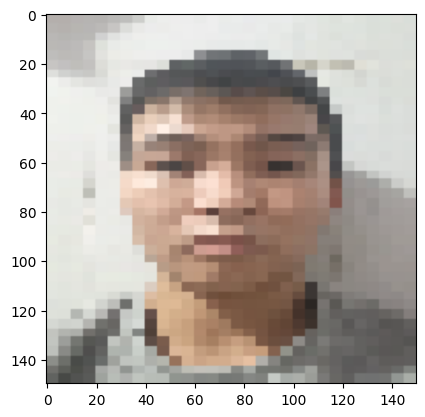

1/1 [==============================] - 0s 22ms/step
Thanh


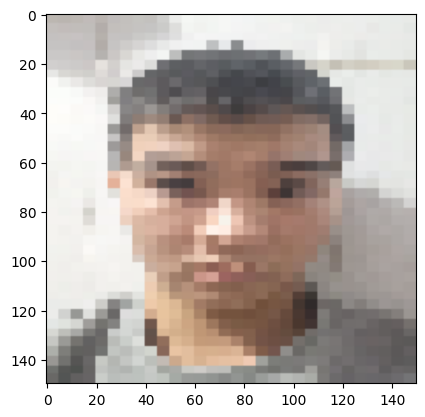

1/1 [==============================] - 0s 22ms/step
QPhuc


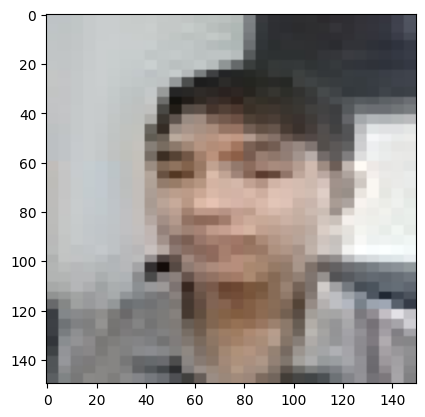

1/1 [==============================] - 0s 24ms/step
QPhuc


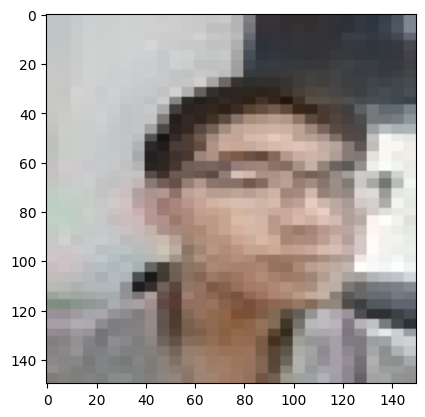

1/1 [==============================] - 0s 33ms/step
Hau


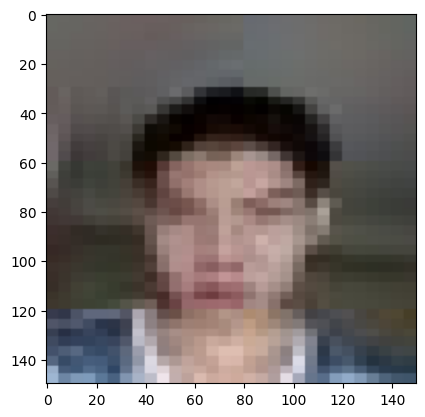

1/1 [==============================] - 0s 34ms/step
Dung


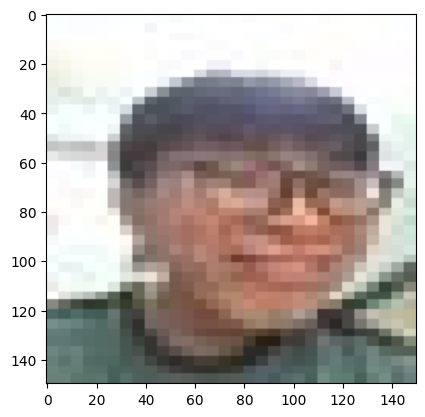

1/1 [==============================] - 0s 20ms/step
HAKiet


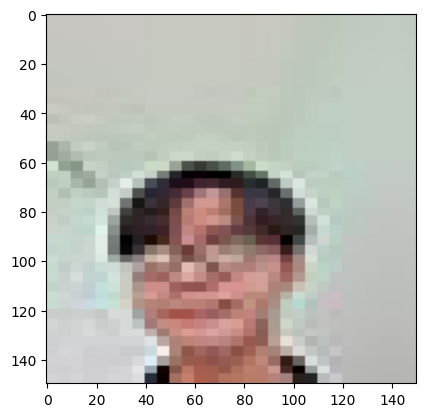

1/1 [==============================] - 0s 22ms/step
HAKiet


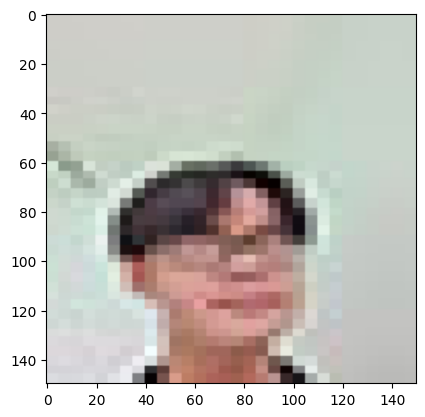

1/1 [==============================] - 0s 19ms/step
Ha


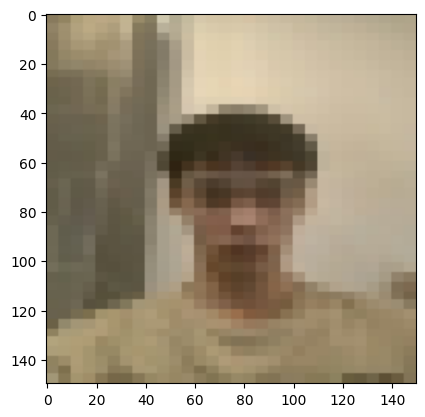

1/1 [==============================] - 0s 20ms/step
SonTung


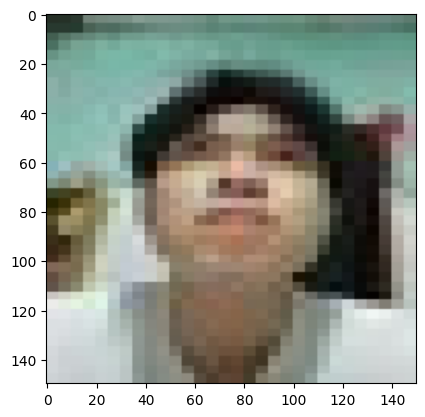

1/1 [==============================] - 0s 21ms/step
Hoang


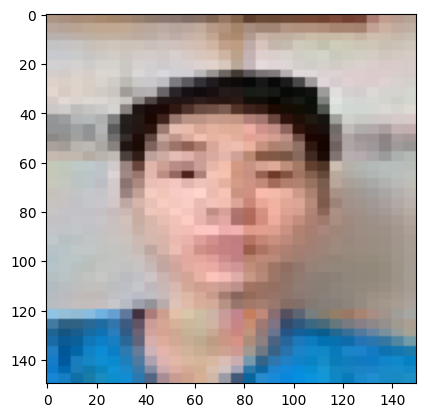

In [14]:
folder="/content/drive/MyDrive/Data_AI/face_test/"

for i in os.listdir(folder):
  img=load_img(folder+i,target_size=(150,150))
  plt.imshow(img)
  img=img_to_array(img)
  img=img.astype('float32')
  img=img/255
  img=np.expand_dims(img,axis=0)
  result=(model_1.predict(img).argmax())
  class_name=['Dung','HAKiet','HQHuy','Ha','Hau','Hieu','HoaiPhong','Hoang','HuuLong','Loc','NTKiet','NgocThach',
 'Phuc','QPhuc','Sang','SonTung','TLoc','TanDat','Thai','Thanh','Thao','Thinh','Tien','Trong','Van','pqhuy']
  print(class_name[result])
  plt.show()